### **WEB MINING PROJECT**

### Aston Glen Noronha, Abhimanyu Agarwala, Shrutik Pawale

#### Company: Oracle

### **Data Cleaning**

In [3]:
import json
import pandas as pd
with open('1-256-data.json') as f:
    data = json.load(f)
df1 = pd.DataFrame(data)
with open('257_512.json') as f:
    data = json.load(f)
df2 = pd.DataFrame(data)
with open('513-772-data.json') as f:
    data = json.load(f)
df3 = pd.DataFrame(data)

In [4]:
df1 = df1.drop('date', axis=1)
df2 = df2.drop('date', axis=1)
df3 = df3.drop('date', axis=1)
df2 = df2.rename(columns={'Text': 'text'})

In [5]:
df = pd.concat([df1, df2, df3])
df = df.reset_index(drop=True)
df

,text,Offer,Experience,Interview Level
0,"I interviewed at Oracle (Bangalore),It started...",No,Positive,Average
1,"I interviewed at Oracle (Prague),Three rounds ...",Accepted,Positive,Average
2,"I interviewed at Oracle,3 Stages, the first in...",No,Neutral,Difficult
3,"I interviewed at Oracle,Entrevistas en ingles,...",Declined,Negative,Difficult
4,"I interviewed at Oracle (Redwood City, CA),One...",Declined,Positive,Easy
...,...,...,...,...
6952,The process took 4 days. I interviewed at Orac...,Accepted,Positive,Average
6953,I applied through college or university. The p...,Accepted,Positive,Easy
6954,I applied through college or university. The p...,Accepted,Positive,Easy
6955,I applied through college or university. The p...,Declined,Neutral,Average


In [6]:
df['Offer'] = df['Offer'].replace({'Accepted': 'Yes', 'Declined': 'Yes'})

In [7]:
df

,text,Offer,Experience,Interview Level
0,"I interviewed at Oracle (Bangalore),It started...",No,Positive,Average
1,"I interviewed at Oracle (Prague),Three rounds ...",Yes,Positive,Average
2,"I interviewed at Oracle,3 Stages, the first in...",No,Neutral,Difficult
3,"I interviewed at Oracle,Entrevistas en ingles,...",Yes,Negative,Difficult
4,"I interviewed at Oracle (Redwood City, CA),One...",Yes,Positive,Easy
...,...,...,...,...
6952,The process took 4 days. I interviewed at Orac...,Yes,Positive,Average
6953,I applied through college or university. The p...,Yes,Positive,Easy
6954,I applied through college or university. The p...,Yes,Positive,Easy
6955,I applied through college or university. The p...,Yes,Neutral,Average


In [8]:
df=df.dropna()
df

,text,Offer,Experience,Interview Level
0,"I interviewed at Oracle (Bangalore),It started...",No,Positive,Average
1,"I interviewed at Oracle (Prague),Three rounds ...",Yes,Positive,Average
2,"I interviewed at Oracle,3 Stages, the first in...",No,Neutral,Difficult
3,"I interviewed at Oracle,Entrevistas en ingles,...",Yes,Negative,Difficult
4,"I interviewed at Oracle (Redwood City, CA),One...",Yes,Positive,Easy
...,...,...,...,...
6952,The process took 4 days. I interviewed at Orac...,Yes,Positive,Average
6953,I applied through college or university. The p...,Yes,Positive,Easy
6954,I applied through college or university. The p...,Yes,Positive,Easy
6955,I applied through college or university. The p...,Yes,Neutral,Average


In [9]:
df = df[df['text'] != 'NA']
df = df[df['Offer'] != 'NA']
df = df[df['Experience'] != 'NA']
df = df[df['Interview Level'] != 'NA']
df

,text,Offer,Experience,Interview Level
0,"I interviewed at Oracle (Bangalore),It started...",No,Positive,Average
1,"I interviewed at Oracle (Prague),Three rounds ...",Yes,Positive,Average
2,"I interviewed at Oracle,3 Stages, the first in...",No,Neutral,Difficult
3,"I interviewed at Oracle,Entrevistas en ingles,...",Yes,Negative,Difficult
4,"I interviewed at Oracle (Redwood City, CA),One...",Yes,Positive,Easy
...,...,...,...,...
6952,The process took 4 days. I interviewed at Orac...,Yes,Positive,Average
6953,I applied through college or university. The p...,Yes,Positive,Easy
6954,I applied through college or university. The p...,Yes,Positive,Easy
6955,I applied through college or university. The p...,Yes,Neutral,Average


In [10]:
df.to_json('Oracle_data.json')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
import json
import pandas as pd
with open('Oracle_data.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df = df.reset_index(drop=True)
df

,text,Offer,Experience,Interview Level
0,"I interviewed at Oracle (Bangalore),It started...",No,Positive,Average
1,"I interviewed at Oracle (Prague),Three rounds ...",Yes,Positive,Average
2,"I interviewed at Oracle,3 Stages, the first in...",No,Neutral,Difficult
3,"I interviewed at Oracle,Entrevistas en ingles,...",Yes,Negative,Difficult
4,"I interviewed at Oracle (Redwood City, CA),One...",Yes,Positive,Easy
...,...,...,...,...
6653,The process took 4 days. I interviewed at Orac...,Yes,Positive,Average
6654,I applied through college or university. The p...,Yes,Positive,Easy
6655,I applied through college or university. The p...,Yes,Positive,Easy
6656,I applied through college or university. The p...,Yes,Neutral,Average


In [14]:
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aston\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess_text(text):
    text = text.replace(',', ' ').replace('.', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = re.sub(r"(?<=,)", " ", text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['text'] = df['text'].apply(preprocess_text)
df['Offer'] = df['Offer'].replace({'Yes': 1, 'No': 0})

In [16]:
df

,text,Offer,Experience,Interview Level
0,interviewed oracle bangalore started introduct...,0,Positive,Average
1,interviewed oracle prague three rounds differe...,1,Positive,Average
2,interviewed oracle stages first interview good...,0,Neutral,Difficult
3,interviewed oracle entrevistas ingles code cha...,1,Negative,Difficult
4,interviewed oracle redwood city one two phone ...,1,Positive,Easy
...,...,...,...,...
6653,process took days interviewed oracle redwood c...,1,Positive,Average
6654,applied college university process took days i...,1,Positive,Easy
6655,applied college university process took months...,1,Positive,Easy
6656,applied college university process took day in...,1,Neutral,Average


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'Experience', 'Interview Level']], df['Offer'], test_size=0.3)

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['text'])
X_test_text = vectorizer.transform(X_test['text'])

In [19]:
encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(X_train[['Experience', 'Interview Level']])
X_test_cat = encoder.transform(X_test[['Experience', 'Interview Level']])

X_train = pd.concat([pd.DataFrame(X_train_text.toarray()), pd.DataFrame(X_train_cat.toarray())], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_text.toarray()), pd.DataFrame(X_test_cat.toarray())], axis=1)

### We used Logistic Regression, Random Forest Regressor, SVM, XGBoost, ABA Boost, KNN, Decision Tree etc along with GridSearchCV and RandomizedSearchCV for hyperparameter tuning.
### In the end, Logistic Regression gives us the best result with an Accuracy of 78% and an F1 Score of 0.84.

### LOGISTIC REGRESSION

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.78003003003003
Precision: 0.7997977755308392
Recall: 0.8927765237020316
F1 Score: 0.8437333333333333


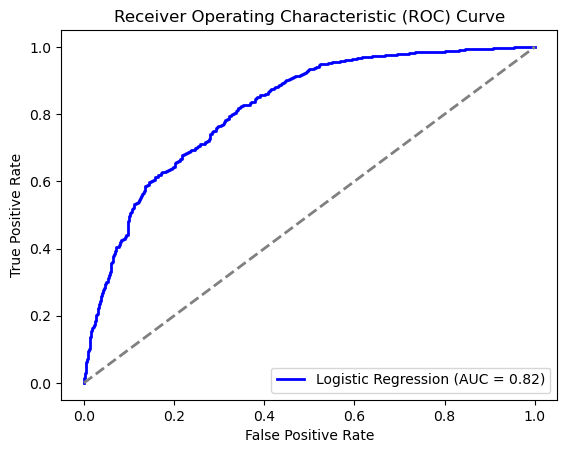

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7717717717717718
Precision: 0.7635869565217391
Recall: 0.9514672686230248
F1 Score: 0.8472361809045226


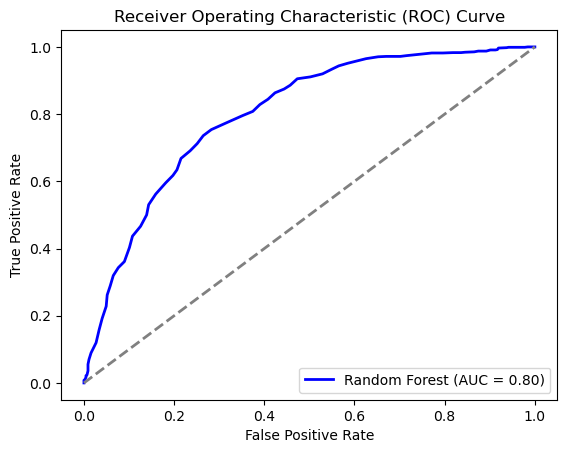

In [36]:
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### ADA Boost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7612612612612613
Precision: 0.8021276595744681
Recall: 0.8510158013544018
F1 Score: 0.8258488499452356


In [ ]:
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')